## Final Capstone - Sentiment Analysis of Yelp Business Reviews

Part I: Data Wrangling & Exploratory Data Analysis

Biman Mondal

July 21, 2025

### Objective

<span style="color: blue; font-family: Arial; font-size: 16px; background-color: #EEEEEE">
The objective of the final capstone is to perform sentiment analysis on customer reviews. The capstone's objective is to understand the nuance of performing natural language processing (NLP) and the various approaches. 
This notebook outlines the exploration of the dataset and to prepare the data for analysis.
</span>

### Import Libraries

In [2]:
# Import numpy package
import numpy as np
# Import pandas package
import pandas as pd
# Import matplotlib package
import matplotlib.pyplot as plt
# Import the seaborn package
import seaborn as sns

# Import time
import time
# Parallel processing
from multiprocessing import Pool, cpu_count
# Import operating system library
import os
import string
# Import tqdm to monitor for loop progress
from tqdm import tqdm 

# Import NLTK and all submodules
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import Spacy
import spacy

# Import Counter
from collections import Counter

In [ ]:
#!pip install -U numpy
#!pip install numpy==2.2.1
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#np.__version__
#pd.__version__
#plt.__version__
#!pip install --upgrade matplotlib
#!pip install --user matplotlib
#!pip uninstall matplotlib
#!pip install matplotlib numpy

In [ ]:
# Import natural language toolkit
# The following installs were required to use the NLTK library
#!pip install nltk
# import nltk
# download nltk corpus (first time only)
#nltk.download('all')
#help(nltk.stem)

In [ ]:
# The following needed to be installed to use the spacy library
#!pip install spacy
#!pip install --upgrade --no-deps h5py 
# Reinstall h5py without reinstalling its dependencies
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_sm
#import spacy


<span style="color: red; font-family: Arial; font-size: 16px; background-color: #EEEEEE">
Both spacy and NLTK libraries required installation.<br />
Experienced some issues with matplotlib and numpy incompatibility with NLTK and Spacy libaraies. 
</span>

### Read dataframe

In [3]:
# Read Dataframe
df = pd.read_csv('../data/raw/yelp_review_fine-grained_5_classes_csv/train.csv', header='infer')

In [4]:
# Inspect the dataframe
df.head()
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.info())

The dataframe has 650000 rows and 2 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650000 entries, 0 to 649999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   class_index  650000 non-null  int64 
 1   review_text  650000 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.9+ MB
None


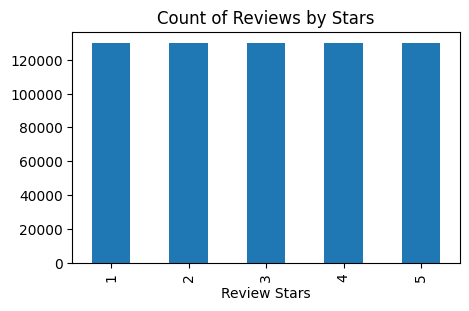

In [5]:
# Plot bar graph of the Review Stars
ax = df['class_index'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(5, 3))
ax.set_xlabel('Review Stars')
plt.show()

<span style="color: blue; font-family: Arial; font-size: 16px; background-color: #EEEEEE">
Looks like the data is equally distributed by number of review stars.<br />
The dataset is free of any null values.<br /> 
There aren't any data wrangling to perform other than text normalization. 
</span>

## Review Statistics

In [6]:
# Create a feature of the length of each review
df['review_length']=df['review_text'].apply(len)

In [18]:
# Average length of review is 732 characters
df['review_length'].describe()

count    650000.000000
mean        732.325468
std         663.721184
min           1.000000
25%         287.000000
50%         539.000000
75%         957.000000
max        5637.000000
Name: review_length, dtype: float64

In [7]:
def get_num_words(text_list):
    num_words = [len(word_tokenize(text.lower())) for text in tqdm(text_list)]
    return num_words

In [14]:
# Create a feature of the length of each review
text_list = df['review_text'].to_list()
start = time.time()
num_words = get_num_words(text_list)
end = time.time()
print(f"Time elapsed: {round((end - start)/60,1)} min")
df['word_count'] = num_words
#word_tokenize(text.lower())

100%|█████████████████████████████████████████████████████████████████████████| 650000/650000 [17:19<00:00, 625.51it/s]

Time elapsed: 17.3 min


<span style="color: blue; font-family: Arial; font-size: 16px; background-color: #EEEEEE">
The above function which tokenizes and extracts text length of the reviews takes 17.3 minutes to run across the entire dataset. 
</span>

In [40]:
df['word_count'] = num_words
# There are on average 154 words per review
df['word_count'].describe()

count    650000.000000
mean        154.513848
std         139.666325
min           1.000000
25%          61.000000
50%         114.000000
75%         202.000000
max        1213.000000
Name: word_count, dtype: float64

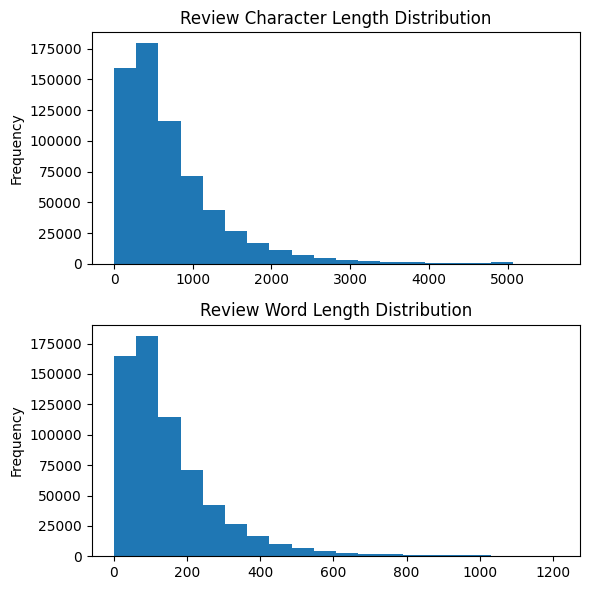

In [48]:
# Plot the character length and word length of the reviews
fig, axs = plt.subplots(2, 1, figsize =(10,6))
#
ax[0] = df['review_length']\
        .plot(kind='hist',bins=20,\
          title='Review Character Length Distribution',\
          ax=axs[0],figsize=(6, 6))
#ax[0].set_xlabel('Review Stars')
#
ax[1] = df['word_count']\
    .plot(kind='hist',bins=20,\
          title='Review Word Length Distribution',\
          figsize=(6, 6))
#ax[1].set_xlabel('Review Stars')
plt.tight_layout()
plt.show()

<span style="color: blue; font-family: Arial; font-size: 16px; background-color: #EEEEEE">
The above plots show that the character length and word counts are both having right skewed distribution. The average reviews fall has 154 words with higher word count being less frequenct.
</span>

In [11]:
# Example Spacy 
#nlp = spacy.load("en_core_web_sm")
#text = preprocess_text(df.iloc[randnum.item(0)].review_text)
#doc = nlp(text)
#for token in doc:
#    print(token, token.lemma_)


In [14]:
# Get random sample of reviews
rand_review = df.sample(n=1)['review_text'].values.item()
print(len(rand_review))

#help(df.sample)
print(dir(df.sample(n=1,random_state=9).review_text.values))

176

### Sample a subset of the dataframe 

In [45]:
#Sample the dataframe with 0.5% of original records
df_sample = df.sample(frac=0.005,random_state=9, axis=0)

# Count the number of samples in each class
print(df_sample['class_index']\
                        .value_counts()\
                        .sort_index())
'''
# Plot the sampled review star distribution
ax = df_sample['class_index']\
                .value_counts()\
                .sort_index()\
                .plot(kind='bar',\
                title='Count of Sampled DF by Review Stars',\
                figsize=(4, 3))
ax.set_xlabel('Review Stars')
plt.show()
'''

class_index
1    654
2    653
3    652
4    657
5    634
Name: count, dtype: int64


"\n# Plot the sampled review star distribution\nax = df_sample['class_index']                .value_counts()                .sort_index()                .plot(kind='bar',                title='Count of Sampled DF by Review Stars',                figsize=(4, 3))\nax.set_xlabel('Review Stars')\nplt.show()\n"

In [42]:
# --- Helper function for parallel processing ---
def parallel_preprocess_series(my_function, text_to_process):
    """
    Applies preprocess_text to a pandas Series in parallel.
    """
    # Get the number of CPU cores available
    num_cores = 4#cpu_count()
    print(f"Using {num_cores} CPU cores for parallel processing.")

    # Create a pool of worker processes
    # The 'with' statement ensures the pool is properly closed
    with Pool(num_cores) as pool:
        # Map the preprocess_text function to each item in the series
        # pool.map returns results in the same order as the input
        processed_data = tqdm.tqdm(pool.map(my_function, text_to_process))

    return processed_data


## Text Normalization

Lowercasing converts all text to lowercase. 
Stop words are common words (e.g., "the," "a," "is," "and") that often carry little meaning on their own and don't contribute significantly to the sentiment of a sentence.
Noise removal involves cleaning up irrelevant characters, symbols, or formatting that do not contribute to the meaning or sentiment.

Tokenization is the process of breaking down a continuous text into smaller units called tokens. These tokens can be words, subwords, or even characters, depending on the specific tokenization strategy used.

Normalization is the process that brings words into standard format.
1) Stemming reduces words to their root form by chopping off suffixes (running -> run) however may lead to non-valid words (organization -> organizat).
2) Lemmatization is the process of reducing inflected forms of a word to its lemma, or base form, as found in a dictionary.


In [18]:
# create function to strip data frame of stop words and punctuation and lemmatize tokens
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words and punctuations in the tokens list
    stp_wrds_puncts = list()
    stp_wrds_puncts.append(string.punctuation)
    stp_wrds_puncts.extend(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stp_wrds_puncts]

    #stemmer = PorterStemmer('English')
    #stemmer = SnowballStemmer('english')
    #stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [ ]:
'''
# Linear to process text
text = df.iloc[randnum.item(0)].review_text
# Tokenize the text
tokens = word_tokenize(text.lower())

# Create a list of stopwords and punctuation
stp_wrds_puncts = list()
stp_wrds_puncts.append(string.punctuation)
stp_wrds_puncts.extend(stopwords.words('english'))

# Remove stop words and punctuations in the tokens list
filtered_tokens = [token for token in tokens if token not in stp_wrds_puncts]
filtered_tokens = ' '.join(filtered_tokens)
# Lemmatize the tokens using Spacy
nlp = spacy.load("en_core_web_sm")
#text = preprocess_text(df.iloc[randnum.item(0)].review_text)
lemmatized_tokens = [token.lemma_ for token in nlp(filtered_tokens)]

# Join the tokens back into a string
processed_text = ' '.join(lemmatized_tokens)
'''

### Run Lemmatization Script

In [ ]:
# Run preprocessing script serially
start = time.time()
df_serial = df_sample.copy() # Work on a copy
df_serial['review_text_processed_serial'] = df_serial['review_text'].apply(preprocess_text)
end = time.time()
print(f"Time elapsed: {round((end - start)/60,1)} min")
df_serial.head()

In [ ]:
# Run preprocessing script in parallel
start = time.time()
# Copy dataframe
df_parallel = df_sample.copy() # Work on a copy
# Perform preprocessing with parallel processing
df_parallel['review_text_processed_parallel'] = parallel_preprocess_series(df_parallel['review_text'])
end = time.time()
print(f"Time elapsed: {round((end - start)/60,1)} min")
df_parallel.head

<span style="color: blue; font-family: Arial; font-size: 16px; background-color: #EEEEEE">
The standard text normalization processing function which tokenizes and lemmatizes the reviews takes over 40 minutes to run just 1% of the dataset. Even when, changing the lemmatization to less accurate stemming method, the function could not process the entire dataset of reviews. Parallel processing the code did not improve run time. After several attempts, this procedure was abandoned.
</span>

### Normalize text reviews with Spacy

In [36]:
 nlp = spacy.load("en_core_web_sm")

In [27]:
# create function to strip data frame of stop words and punctuation and lemmatize tokens
def preprocess_text_spacy(review_list):
    
    processed_text = list()
    for text in tqdm(review_list):
        # Tokenize the text
        tokens = word_tokenize(text.lower())

        # Create a list of stopwords and punctuation
        stp_wrds_puncts = list()
        stp_wrds_puncts.append(string.punctuation)
        stp_wrds_puncts.extend(stopwords.words('english'))

        # Remove stop words and punctuations in the tokens list
        filtered_tokens = [token for token in tokens if token not in stp_wrds_puncts]
        filtered_tokens = ' '.join(filtered_tokens)
        # Lemmatize the tokens using Spacy
       
        #text = preprocess_text(df.iloc[randnum.item(0)].review_text)
        lemmatized_tokens = [token.lemma_ for token in nlp(filtered_tokens)]

        # Join the tokens back into a string
        #processed_text = ' '.join(lemmatized_tokens)
        processed_text.append(' '.join(lemmatized_tokens))

    return processed_text

In [ ]:
#textlist = df_serial.sample(n=4)['review_text'].values
#processed_list = preprocess_text_spacy(textlist)

#Process values with for loop instead of using apply function within Pandas
start = time.time()
df_spacy = df_sample.copy()
review_list = df_spacy['review_text'].to_list()
processed_text = list()
for text in tqdm(review_list):
    processed_text.append(preprocess_text_spacy(text))
print("Loop completed")
end = time.time()
print(f"Time elapsed: {round((end - start)/60,1)} min")
df_spacy['review_text_processed_spacy'] = processed_text

In [ ]:
start = time.time()
# Get the number of CPU cores available
num_cores = 4 #cpu_count()
#print(f"Using {num_cores} CPU cores for parallel processing.")
# Create a pool of worker processes
# The 'with' statement ensures the pool is properly closed
with Pool(num_cores) as pool:
    # Map the preprocess_text function to each item in the series
    # pool.map returns results in the same order as the input
    myseries = df_sample.sample(n=10)['review_text'].values
    processed_data = pool.map(preprocess_text_spacy, myseries)
        
end = time.time()
print(f"Time elapsed: {round((end - start)/60,1)} min")

Using 4 CPU cores for parallel processing.


<span style="color: blue; font-family: Arial; font-size: 16px; background-color: #EEEEEE">
Running Spacy to perform normalization does not improve run times in comparison with NLTK. Running the code in parallel did not show run time improvement.
</span>

### Bag of Words Frequency Count


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(procesed_text)

word_counts = np.sum(X.toarray(), axis=0)
words = vectorizer.get_feature_names_out()
#X.shape
#word_counts.shape
#my_tokens = [word_tokenize(text) for text in my_sample]

In [117]:
my_sample = df.sample(n=100)['review_text'].values.tolist()


#tokens = word_tokenize(text.lower())
#stp_wrds_puncts = list()
#stp_wrds_puncts.append(string.punctuation)
#stp_wrds_puncts.extend(stopwords.words('english'))


#processed_text = preprocess_text_spacy(my_sample)

In [58]:
# Create a list of stopwords and punctuation
stp_wrds_puncts = list()
stp_wrds_puncts.append(string.punctuation)
stp_wrds_puncts.extend(stopwords.words('english'))

In [125]:
def tokenize_count(text_list):
    token_list = list()
    for text in tqdm(text_list):
        # Tokenize the text
        tokens = word_tokenize(text.lower())
        # Remove stop words and punctuations in the tokens list
        filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
        filtered_tokens = [token for token in filtered_tokens if token not in string.punctuation]
        token_list.extend(filtered_tokens)
    return Counter(token_list)

In [126]:
counted_tokens = tokenize_count(my_sample)
#counted_tokens = Counter(processed_text)#[Counter(processed_text) for token in processed_text]
#counted_tokens.most_common(1)
#help(Counter)
#df_sample = df.sample(n=100,random_state=9, axis=0)
#df_sample
#counted_tokens[1].most_common(2)

100%|███████████████████████████████████████████| 100/100 [00:04<00:00, 24.70it/s]


In [131]:
counted_tokens.most_common(5)

[("'s", 106), ("n't", 85), ('food', 73), ("''", 54), ('good', 51)]

### Summary

The dataset from hugging face used for sentiment analysis has 650k records with review text and rating (1-5). The first attempt to lemmatize the text using NLTK was extremely slow. The processing speed was nearly an hour. Downsampling the original dataframe to 0.5% of the records lead to over a half-hour run time to preprocess and normalize the text.
Running the analysis in parallel did not improve.